# Task 4: Exploratory Data Analysis - Terrorism
## Author: Mahmoud Ahmed Shimy
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis (EDA
   )</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Important note:
All the conclusions, results, and recommendations are derived according to this dataset which is not considering the World Wars as terrorist acts and did not waste the lives of millions of people.
### Dataset Description 
> I have selected the **Global Terrorism** dataset to investigate it and do some **E**xploratory **D**ata **A**nalysis by exploring the correlations between the varies things on it and find patterns to find out the hot zones of terrorism and get all security issues and insights I can derive by answering some question that we will ask now.


#### Question(s) for Analysis
<ol>
<li>First step after importing and wrangling the data is to check the Uni-Variate Analysis by getting the top 5 countries, Governates and Regions by number of attacks. and starts <a href="#Q1">here</a></li>
<li>Also it is important to know the most used types of attacks and targets globally. <a href="#Q2">here</a></li>
<li>Going to Bi-Variate analysis it's important to answer some questions like what is the most countries, regions has kills and kills per attack and the most target, attack type in each zone. <a href="#Q3">here</a></li>
<li>Finally with Multi-Variate Analysis we need to know the most target and attack type in each country in the Region and starts <a href="#Q4">here</a></li>
</ol>

### importing Liberaries and DataFrame
>This section is to import the necessary liberaries and DataFrame

In [1]:
# for data frames
import pandas as pd
# for numerical fn.
import numpy as np
# for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from pandas_profiling import ProfileReport

C:\Users\ip\AppData\Local\Temp\ipykernel_9692\1908016125.py:9: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
# pip install ipywidgets
# pip install pandas-profiling

<a id='wrangling'></a>
## Data Wrangling section
> In this section we will do some gathering, assessing and cleaning to the data to be more suatable and easy to analyse

In [3]:
df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding='latin-1')

C:\Users\ip\AppData\Local\Temp\ipykernel_9692\2266119131.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding='latin-1')


In [4]:
df.shape

(181691, 135)

Now we know that the data has about 180k observations and 135 column.

Lets look at 3 random observations.

In [5]:
# to see all columns
pd.set_option('display.max_columns', None)
df.sample(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
135329,201407210019,2014,7,21,NaN,0,NaN,4,Afghanistan,6,South Asia,Faryab,Qaysar district,35.687416,64.293102,3.0,0,NaN,07/21/2014: A roadside bomb detonated in Qaysa...,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,14,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,Not Applicable,Civilians,4.0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A roadside bomb was used in the attack.,2.0,0.0,0.0,4.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The victims were family members of an Afghan N...,"""Afghanistan: Two Civilians, 15 Insurgents, 8 ...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
6072,197803060001,1978,3,6,NaN,0,NaN,130,Mexico,1,North America,Jalisco,Guadalajara,20.673343,-103.344177,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,1,Business,3.0,Bank/Commerce,NaN,Bank,130.0,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Union of the People (UDP),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
171289,201701180030,2017,1,18,"January 15-21, 2017",0,NaN,45,Colombia,3,South America,Unknown,Unknown,NaN,NaN,5.0,0,The incident occurred in either Norte de Santa...,"01/00/2017: Sometime between January 15, 2017 ...",1,1,1,0.0,NaN,NaN,1.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,21,Utilities,108.0,Oil,Ecopetrol,Cano Limon-Covenas Oil Pipeline,45.0,Colombia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National Liberation Army of Colombia (ELN),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,An oil pipeline was damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Bombings halted pumping at Colombia's Cano-Li...","""Wave of Attacks Hit Colombia Pipeline,"" Energ...",NaN,START Primary Collection,0,0,0,0,"201701180024, 201701180025, 201701180026, 2017..."



### Data Assessing & Cleaning
> After gathering the data it has some problems and needs to be cleand so let's take a look on some of these problems.

Firstly there's many columns that we will not use lets take what we need from columns.

In [6]:
df = df[["eventid","iday", "iyear", "imonth", "country_txt", "region_txt", "provstate", "city", "latitude", "longitude", "success", "attacktype1_txt","nkill", "target1"]]

In [7]:
df.shape

(181691, 14)

Now it has 15 columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   eventid          181691 non-null  int64  
 1   iday             181691 non-null  int64  
 2   iyear            181691 non-null  int64  
 3   imonth           181691 non-null  int64  
 4   country_txt      181691 non-null  object 
 5   region_txt       181691 non-null  object 
 6   provstate        181270 non-null  object 
 7   city             181257 non-null  object 
 8   latitude         177135 non-null  float64
 9   longitude        177134 non-null  float64
 10  success          181691 non-null  int64  
 11  attacktype1_txt  181691 non-null  object 
 12  nkill            171378 non-null  float64
 13  target1          181055 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 19.4+ MB


In [9]:
df[df.city == "Unknown"].sample(2)

,eventid,iday,iyear,imonth,country_txt,region_txt,provstate,city,latitude,longitude,success,attacktype1_txt,nkill,target1
54327,199212030028,3,1992,12,France,Western Europe,Corsica,Unknown,41.918891,8.737554,1,Bombing/Explosion,0.0,Office
168072,201610130036,13,2016,10,India,South Asia,Uttar Pradesh,Unknown,26.846708,80.946159,0,Assassination,0.0,Vehicle of Consultant of Chief Minister: Sanja...


I've noticed that there's many Unknown cities<br>
lets make it null values

In [10]:
df.replace("Unknown", np.nan, inplace=True)

In [11]:
df[df.iday == 0].sample(2)

,eventid,iday,iyear,imonth,country_txt,region_txt,provstate,city,latitude,longitude,success,attacktype1_txt,nkill,target1
5334,197710000002,0,1977,10,Colombia,South America,Antioquia,Medellin,6.242026,-75.564766,1,Hostage Taking (Kidnapping),0.0,"Gilberto Restrepo Velez, landowner"
102946,201109010010,0,2011,9,India,South Asia,Chhattisgarh,Raipur,21.251384,81.629641,0,Bombing/Explosion,0.0,The targets of the attempted bombing were poli...


There's many days and months is 0 <br>
let's make it Null

In [12]:
df[["iday", "imonth"]] = df[["iday", "imonth"]].replace(0, np.nan)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   eventid          181691 non-null  int64  
 1   iday             180800 non-null  float64
 2   iyear            181691 non-null  int64  
 3   imonth           181671 non-null  float64
 4   country_txt      181691 non-null  object 
 5   region_txt       181691 non-null  object 
 6   provstate        176980 non-null  object 
 7   city             171482 non-null  object 
 8   latitude         177135 non-null  float64
 9   longitude        177134 non-null  float64
 10  success          181691 non-null  int64  
 11  attacktype1_txt  174415 non-null  object 
 12  nkill            171378 non-null  float64
 13  target1          175137 non-null  object 
dtypes: float64(5), int64(3), object(6)
memory usage: 19.4+ MB


In [14]:
df.dropna(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.sample(2)

,eventid,iday,iyear,imonth,country_txt,region_txt,provstate,city,latitude,longitude,success,attacktype1_txt,nkill,target1
44845,199012110011,11.0,1990,12.0,Philippines,Southeast Asia,Metropolitian Manila,Manila,14.596051,120.978666,1,Assassination,1.0,Patrolman assigned to western police dist. hom...
73362,200111150006,15.0,2001,11.0,Sri Lanka,South Asia,Eastern,Batticaloa,7.733107,81.688820,1,Bombing/Explosion,4.0,Former Liberation Tigers of Tamil Eelam (LTTE)...


Now lets creat a new columns calles date 

In [18]:
df["date"] = pd.to_datetime(dict(year = df.iyear, month = df.imonth, day = df.iday))

Also lets make the 'eventid' as index for our data then drop it.

In [19]:
df.set_index(df.eventid, inplace=True)
df.sample()

,eventid,iday,iyear,imonth,country_txt,region_txt,provstate,city,latitude,longitude,success,attacktype1_txt,nkill,target1,date
eventid,,,,,,,,,,,,,,,
200703270013,200703270013,27.0,2007,3.0,Iraq,Middle East & North Africa,Baghdad,Baghdad,33.303566,44.371773,1,Armed Assault,3.0,Waqf Officers in Baghdad,2007-03-27


In [20]:
df.eventid.duplicated().sum()

0

In [21]:
df.drop(columns="eventid",inplace=True)

As a final step in cleaning data lets rename all columns to be easier to read.

In [22]:
df.rename(columns={"iday" : "day", "iyear" : "year", "imonth" : "month", "region_txt" : "region", "provstate" : "state", "attacktype1_txt" : "attack_type", "target1" : "target", "country_txt" : "country"}, inplace=True)

In [23]:
df.head(3)

,day,year,month,country,region,state,city,latitude,longitude,success,attack_type,nkill,target,date
eventid,,,,,,,,,,,,,,
197001010002,1.0,1970,1.0,United States,North America,Illinois,Cairo,37.005105,-89.176269,1,Armed Assault,0.0,Cairo Police Headquarters,1970-01-01
197001020001,2.0,1970,1.0,Uruguay,South America,Montevideo,Montevideo,-34.891151,-56.187214,0,Assassination,0.0,Juan Maria de Lucah/Chief of Directorate of in...,1970-01-02
197001020002,2.0,1970,1.0,United States,North America,California,Oakland,37.791927,-122.225906,1,Bombing/Explosion,0.0,Edes Substation,1970-01-02


In [24]:
df.day = df.day.astype(int)
df.month = df.month.astype(int)
df.nkill = df.nkill.astype(int)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147519 entries, 197001010002 to 201712310031
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   day          147519 non-null  int32         
 1   year         147519 non-null  int64         
 2   month        147519 non-null  int32         
 3   country      147519 non-null  object        
 4   region       147519 non-null  object        
 5   state        147519 non-null  object        
 6   city         147519 non-null  object        
 7   latitude     147519 non-null  float64       
 8   longitude    147519 non-null  float64       
 9   success      147519 non-null  int64         
 10  attack_type  147519 non-null  object        
 11  nkill        147519 non-null  int32         
 12  target       147519 non-null  object        
 13  date         147519 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(3), int64(2), object(6)
mem

In [26]:
df.describe()

,day,year,month,latitude,longitude,success,nkill
count,147519.000000,147519.000000,147519.000000,147519.000000,1.475190e+05,147519.000000,147519.000000
mean,15.587802,2003.027454,6.471336,23.884283,-5.552770e+02,0.904541,2.307974
std,8.767093,12.979404,3.389837,18.694646,2.243946e+05,0.293849,11.703643
min,1.000000,1970.000000,1.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,8.000000,1991.000000,4.000000,11.707204,5.908448e+00,1.000000,0.000000
50%,15.000000,2009.000000,6.000000,31.633078,4.349141e+01,1.000000,0.000000
75%,23.000000,2014.000000,9.000000,34.816667,6.902103e+01,1.000000,2.000000
max,31.000000,2017.000000,12.000000,74.633553,1.793667e+02,1.000000,1570.000000


Now we have cleaned data without missing or duplicated values and ready to be explored

<a id='eda'></a>
## Exploring Data Section (EDA)
> After wrangling the data, In this section we will answer some questions by analysing the data to create some Conclusions about the dataframe.
> All these questions is from my deep mind and of course you may have different questions so don't be restricted by this questions.

In [27]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
df.sample(2)

,day,year,month,country,region,state,city,latitude,longitude,success,attack_type,nkill,target,date
eventid,,,,,,,,,,,,,,
201403090024,9,2014,3,Iraq,Middle East & North Africa,Saladin,Hay al-Qadisiyah,34.458889,43.791004,1,Assassination,1,Mayor,2014-03-09
201407050047,5,2014,7,Afghanistan,South Asia,Zabul,Shahjoy district,32.503195,67.415893,1,Bombing/Explosion,2,Vehicle,2014-07-05


<a id='Q1'></a>
## Uni-variate analysis

In [29]:
def pltbar(datax, datay, namex, namey, title):
    plt.bar(
    x = datax,
    height = datay
    )
    plt.xlabel(namex, fontsize = 15)
    plt.ylabel(namey, fontsize = 15)
    plt.title(title, fontsize = 15)

In [30]:
# City
print("Top 5 countries\n",df.country.value_counts()[:5])

Top 5 countries
 Iraq           21066
Pakistan       12987
India          10163
Afghanistan     9523
Colombia        6379
Name: country, dtype: int64


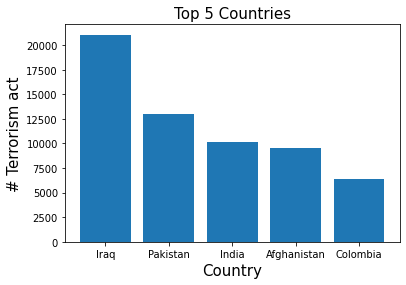

In [31]:
pltbar(df.country.value_counts()[:5].index, df.country.value_counts()[:5].values, "Country", "# Terrorism act", "Top 5 Countries")

Top 5 Governates
 Baghdad             7129
Northern Ireland    4158
Balochistan         3255
Sindh               3030
Saladin             2838
Name: state, dtype: int64


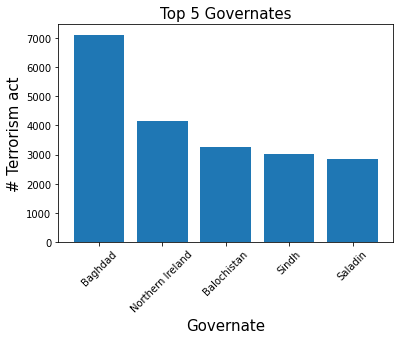

In [32]:
# State
print("Top 5 Governates\n",df.state.value_counts()[:5])
pltbar(df.state.value_counts()[:5].index, df.state.value_counts()[:5].values, "Governate", "# Terrorism act", "Top 5 Governates")
plt.xticks(rotation = 45);

Top 5 Regions
 Middle East & North Africa    41296
South Asia                    37717
South America                 15001
Western Europe                14498
Sub-Saharan Africa            13534
Name: region, dtype: int64


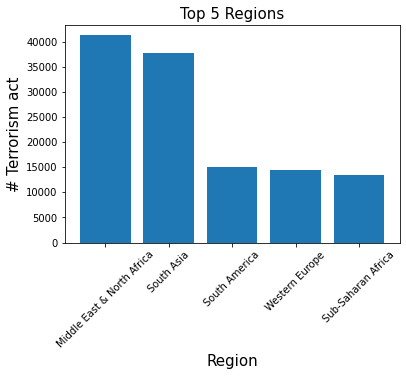

In [33]:
# Region
print("Top 5 Regions\n",df["region"].value_counts()[:5])
pltbar(df.region.value_counts()[:5].index, df.region.value_counts()[:5].values, "Region", "# Terrorism act", "Top 5 Regions")
plt.xticks(rotation = 45);

<a id='Q2'></a>

Top 5 Type of attacks
 Bombing/Explosion                 74250
Armed Assault                     36442
Assassination                     17897
Facility/Infrastructure Attack     9150
Hostage Taking (Kidnapping)        7529
Name: attack_type, dtype: int64


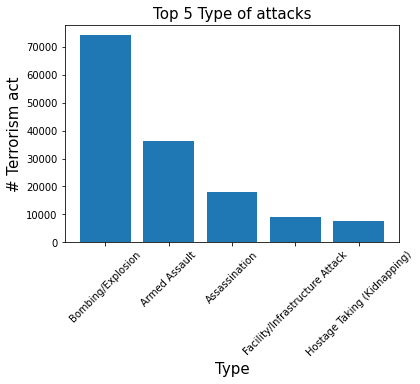

In [34]:
# type
print("Top 5 Type of attacks\n",df.attack_type.value_counts()[:5])
pltbar(df.attack_type.value_counts()[:5].index, df.attack_type.value_counts()[:5].values, "Type", "# Terrorism act", "Top 5 Type of attacks")
plt.xticks(rotation = 45);

Top 5 Targets
 Civilians     5688
Patrol        2693
Vehicle       2533
Checkpoint    2411
Soldiers      2261
Name: target, dtype: int64


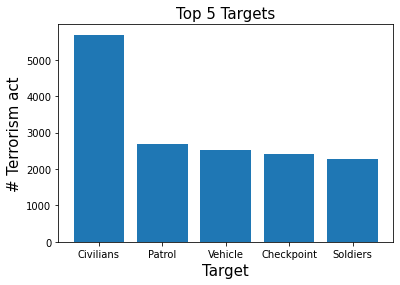

In [35]:
# target
print("Top 5 Targets\n",df.target.value_counts()[:5])
pltbar(df.target.value_counts()[:5].index, df.target.value_counts()[:5].values, "Target", "# Terrorism act", "Top 5 Targets")

success
0     14082
1    133437
Name: day, dtype: int64

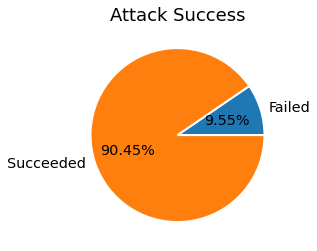

In [36]:
# success
plt.pie(df.groupby(df.success).count().day, labels=["Failed", "Succeeded"], autopct='%.2f%%',
       wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'});
plt.title('Attack Success', fontsize=18)
df.groupby(df.success).count().day

In [37]:
# Year
df.year.value_counts()[:5]

2014    13721
2015    11938
2016    10540
2013    10407
2017     8341
Name: year, dtype: int64

In [38]:
# Numerical Data
df.describe()

,day,year,month,latitude,longitude,success,nkill
count,147519.000000,147519.000000,147519.000000,147519.000000,1.475190e+05,147519.000000,147519.000000
mean,15.587802,2003.027454,6.471336,23.884283,-5.552770e+02,0.904541,2.307974
std,8.767093,12.979404,3.389837,18.694646,2.243946e+05,0.293849,11.703643
min,1.000000,1970.000000,1.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,8.000000,1991.000000,4.000000,11.707204,5.908448e+00,1.000000,0.000000
50%,15.000000,2009.000000,6.000000,31.633078,4.349141e+01,1.000000,0.000000
75%,23.000000,2014.000000,9.000000,34.816667,6.902103e+01,1.000000,2.000000
max,31.000000,2017.000000,12.000000,74.633553,1.793667e+02,1.000000,1570.000000


<a id='Q3'></a>
## Bi-Variate Analysis
Q1: what is the most country has kills?

country
Iraq           68408
Afghanistan    31385
Pakistan       22552
Nigeria        21201
India          16236
Name: nkill, dtype: int32

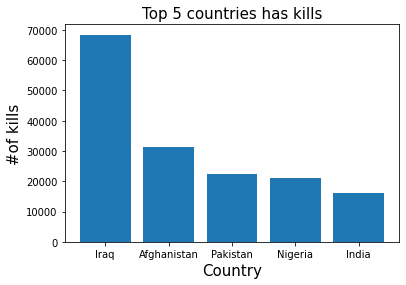

In [39]:
pltbar(df.groupby(df.country).sum().sort_values(by="nkill", ascending=False)[:5].nkill.index,  df.groupby(df.country).sum().sort_values(by="nkill", ascending=False)[:5].nkill.values, "Country", "#of kills", "Top 5 countries has kills")
df.groupby(df.country).sum().sort_values(by="nkill", ascending=False)[:5].nkill

Q2: What is the top 5 countries in average kills by attack?

,day,year,month,latitude,longitude,success,nkill
country,,,,,,,
South Vietnam,15.000000,1972.000000,6.000000,13.977956,108.002298,1.000000,81.000000
Barbados,14.000000,1981.333333,6.333333,13.126551,-59.545478,1.000000,25.333333
Rwanda,14.322835,1998.464567,5.031496,-1.958385,29.835836,0.968504,19.811024
South Sudan,15.172662,2015.402878,6.323741,6.564728,30.774401,0.906475,14.323741
Djibouti,15.882353,1992.764706,6.117647,11.584890,42.953165,1.000000,11.647059
Niger,14.917431,2008.788991,5.972477,15.051038,8.122337,0.963303,10.532110


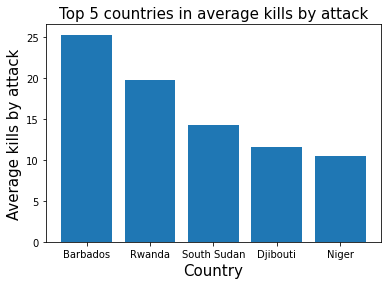

In [40]:
pltbar(df.groupby(df.country).mean().sort_values("nkill", ascending=False)[1:6].index, df.groupby(df.country).mean().sort_values("nkill", ascending=False).nkill[1:6].values, "Country", "Average kills by attack", "Top 5 countries in average kills by attack")
df.groupby(df.country).mean().sort_values("nkill", ascending=False)[:6]

Q3: What is the most target in each country?

In [41]:
for x in df.groupby(df.country).sum().sort_values(by="country").index:
    print("The most target in",x,"is",df[df.country == x].groupby("target").count().sort_values('nkill',ascending = False)[:1].index[0],"with",df[df.country == x].groupby("target").count().sort_values('nkill',ascending = False)[:1].day.values,"attacks")

The most target in Afghanistan is Vehicle with [659] attacks
The most target in Albania is bridge with [3] attacks
The most target in Algeria is Unit with [55] attacks
The most target in Angola is High tension line tower with [113] attacks
The most target in Argentina is office with [19] attacks
The most target in Armenia is Andranik Markarian with [1] attacks
The most target in Australia is Church with [8] attacks
The most target in Austria is Embassy Official with [5] attacks
The most target in Azerbaijan is Afiyaddin Jalilou, Deputy to Parliament Chairman with [1] attacks
The most target in Bahamas is Car and home of Norman Solomon leader of Social Democratic Party with [1] attacks
The most target in Bahrain is Officers with [28] attacks
The most target in Bangladesh is Bus with [60] attacks
The most target in Barbados is British West Indies Airways Offices with [1] attacks
The most target in Belarus is A prison was targeted in the attack. with [1] attacks
The most target in Belgium

Q4: What is the most attack_type in each country?

In [42]:
for x in df.groupby(df.country).sum().sort_values(by="country").index:
    print("The most attack_type in",x,"is",df[df.country == x].groupby("attack_type").count().sort_values('nkill',ascending = False)[:1].index[0],"with",df[df.country == x].groupby("target").count().sort_values('nkill',ascending = False)[:1].day.values,"attacks")

The most attack_type in Afghanistan is Bombing/Explosion with [659] attacks
The most attack_type in Albania is Bombing/Explosion with [3] attacks
The most attack_type in Algeria is Bombing/Explosion with [55] attacks
The most attack_type in Angola is Bombing/Explosion with [113] attacks
The most attack_type in Argentina is Bombing/Explosion with [19] attacks
The most attack_type in Armenia is Bombing/Explosion with [1] attacks
The most attack_type in Australia is Facility/Infrastructure Attack with [8] attacks
The most attack_type in Austria is Bombing/Explosion with [5] attacks
The most attack_type in Azerbaijan is Bombing/Explosion with [1] attacks
The most attack_type in Bahamas is Bombing/Explosion with [1] attacks
The most attack_type in Bahrain is Bombing/Explosion with [28] attacks
The most attack_type in Bangladesh is Bombing/Explosion with [60] attacks
The most attack_type in Barbados is Bombing/Explosion with [1] attacks
The most attack_type in Belarus is Bombing/Explosion wi

Q5: what is the most Region has kills?

region
Middle East & North Africa     115913
South Asia                      85891
Sub-Saharan Africa              63695
South America                   22832
Central America & Caribbean     21118
Name: nkill, dtype: int32

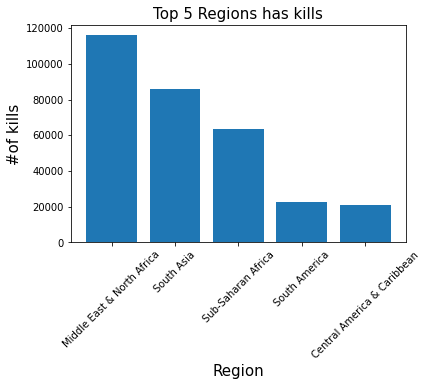

In [43]:
pltbar(df.groupby(df.region).sum().sort_values(by="nkill", ascending=False)[:5].nkill.index,  df.groupby(df.region).sum().sort_values(by="nkill", ascending=False)[:5].nkill.values, "Region", "#of kills", "Top 5 Regions has kills")
plt.xticks(rotation = 45);
df.groupby(df.region).sum().sort_values(by="nkill", ascending=False)[:5].nkill

Q6: What is the top 5 Regions in average kills by attack?

region
Sub-Saharan Africa             4.706295
Central America & Caribbean    3.318875
Middle East & North Africa     2.806882
South Asia                     2.277249
East Asia                      1.752000
Name: nkill, dtype: float64

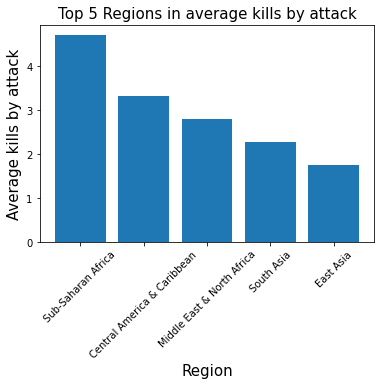

In [44]:
pltbar(df.groupby(df.region).mean().sort_values("nkill", ascending=False)[:5].index, df.groupby(df.region).mean().sort_values("nkill", ascending=False).nkill[:5].values, "Region", "Average kills by attack", "Top 5 Regions in average kills by attack")
plt.xticks(rotation = 45);
df.groupby(df.region).mean().sort_values("nkill", ascending=False)[:5].nkill

Q7: What is the most target in each Region?

In [45]:
for x in df.groupby(df.region).sum().sort_values(by="region").index:
    print("The most target in",x,"is",df[df.region == x].groupby("target").count().sort_values('nkill',ascending = False)[:1].index[0],"with",df[df.region == x].groupby("target").count().sort_values('nkill',ascending = False)[:1].day.values,"attacks")

The most target in Australasia & Oceania is Church with [8] attacks
The most target in Central America & Caribbean is Military Unit with [557] attacks
The most target in Central Asia is Russian Military with [12] attacks
The most target in East Asia is Pavement, major street with [11] attacks
The most target in Eastern Europe is Soldiers with [304] attacks
The most target in Middle East & North Africa is Civilians with [3428] attacks
The most target in North America is Church with [37] attacks
The most target in South America is Bus with [303] attacks
The most target in South Asia is Civilians with [1255] attacks
The most target in Southeast Asia is Patrol with [255] attacks
The most target in Sub-Saharan Africa is Village with [911] attacks
The most target in Western Europe is Bank with [142] attacks


Q8: What is the most attack_type in each Region?

In [46]:
for x in df.groupby(df.region).sum().sort_values(by="region").index:
    print("The most attack_type in",x,"is",df[df.region == x].groupby("attack_type").count().sort_values('nkill',ascending = False)[:1].index[0],"with",df[df.region == x].groupby("target").count().sort_values('nkill',ascending = False)[:1].day.values,"attacks")

The most attack_type in Australasia & Oceania is Facility/Infrastructure Attack with [8] attacks
The most attack_type in Central America & Caribbean is Armed Assault with [557] attacks
The most attack_type in Central Asia is Bombing/Explosion with [12] attacks
The most attack_type in East Asia is Bombing/Explosion with [11] attacks
The most attack_type in Eastern Europe is Bombing/Explosion with [304] attacks
The most attack_type in Middle East & North Africa is Bombing/Explosion with [3428] attacks
The most attack_type in North America is Bombing/Explosion with [37] attacks
The most attack_type in South America is Bombing/Explosion with [303] attacks
The most attack_type in South Asia is Bombing/Explosion with [1255] attacks
The most attack_type in Southeast Asia is Bombing/Explosion with [255] attacks
The most attack_type in Sub-Saharan Africa is Armed Assault with [911] attacks
The most attack_type in Western Europe is Bombing/Explosion with [142] attacks


<a id='Q4'></a>
# Multi-Variate Analysis
Q9: What is the top 5 states & cities in **Iraq** has #of kills?

In [47]:
df[df.country == "Iraq"].groupby("state").sum().nkill.sort_values(ascending = False)[:5]

state
Baghdad     19405
Nineveh     13358
Al Anbar     9837
Saladin      9036
Diyala       6971
Name: nkill, dtype: int32

In [48]:
df[df.country == "Iraq"].groupby("city").sum().nkill.sort_values(ascending = False)[:5]

city
Baghdad    19343
Mosul       6297
Tikrit      2526
Ramadi      2026
Baqubah     1680
Name: nkill, dtype: int32

Q10: What is the most target & attack_type in **Middle East** countries?

In [49]:
for x in df[df.region == "Middle East & North Africa"].groupby(df.country).sum().sort_values(by="nkill", ascending = False).index:
    print("The most target in",x,"is",df[df.country == x].groupby("target").count().sort_values('nkill',ascending = False)[:1].index[0],"with",df[df.country == x].groupby("target").count().sort_values('nkill',ascending = False)[:1].nkill.values,"attacks")

The most target in Iraq is Civilians with [2906] attacks
The most target in Syria is Neighborhood with [218] attacks
The most target in Algeria is Unit with [55] attacks
The most target in Yemen is Checkpoint with [108] attacks
The most target in Turkey is Vehicle with [155] attacks
The most target in Lebanon is Patrol with [50] attacks
The most target in Egypt is Checkpoint with [217] attacks
The most target in Libya is Soldiers with [65] attacks
The most target in Israel is Civilians with [82] attacks
The most target in Iran is Vehicle with [8] attacks
The most target in West Bank and Gaza Strip is Soldiers with [80] attacks
The most target in Saudi Arabia is Patrol with [25] attacks
The most target in Tunisia is Patrol with [9] attacks
The most target in Jordan is Offical with [4] attacks
The most target in United Arab Emirates is Airliner with [1] attacks
The most target in Morocco is student member with [3] attacks
The most target in Kuwait is Unit with [2] attacks
The most target

In [50]:
for x in df[df.region == "Middle East & North Africa"].groupby(df.country).count().sort_values(by="day", ascending = False).index:
    print("The most attack_type in",x,"is",df[df.country == x].groupby("attack_type").count().sort_values('nkill',ascending = False)[:1].index[0],"with",df[df.country == x].groupby("attack_type").count().sort_values('nkill',ascending = False)[:1].day.values,"attacks")

The most attack_type in Iraq is Bombing/Explosion with [16187] attacks
The most attack_type in Turkey is Bombing/Explosion with [1647] attacks
The most attack_type in Yemen is Bombing/Explosion with [1098] attacks
The most attack_type in Algeria is Bombing/Explosion with [958] attacks
The most attack_type in Lebanon is Bombing/Explosion with [1214] attacks
The most attack_type in Egypt is Bombing/Explosion with [881] attacks
The most attack_type in West Bank and Gaza Strip is Armed Assault with [802] attacks
The most attack_type in Libya is Bombing/Explosion with [831] attacks
The most attack_type in Israel is Bombing/Explosion with [1164] attacks
The most attack_type in Syria is Bombing/Explosion with [1289] attacks
The most attack_type in Iran is Bombing/Explosion with [260] attacks
The most attack_type in Saudi Arabia is Bombing/Explosion with [167] attacks
The most attack_type in Bahrain is Bombing/Explosion with [102] attacks
The most attack_type in Jordan is Bombing/Explosion wit

Q11: What is the most target & attack_type in **Iraq** states?

In [51]:
for x in df[df.country == "Iraq"].groupby(df.state).count().sort_values(by="day", ascending = False).index:
    print("The most target in",x,"is",df[df.state == x].groupby("target").count().sort_values('nkill',ascending = False)[:1].index[0],"with",df[df.state == x].groupby("target").count().sort_values('nkill',ascending = False)[:1].day.values,"attacks")

The most target in Baghdad is Civilians with [1411] attacks
The most target in Saladin is Patrol with [266] attacks
The most target in Diyala is Civilians with [409] attacks
The most target in Nineveh is Civilians with [223] attacks
The most target in Al Anbar is Civilians with [231] attacks
The most target in Kirkuk is Civilians with [134] attacks
The most target in Babil is Civilians with [165] attacks
The most target in Basra is Civilians with [9] attacks
The most target in Karbala is Civilians with [17] attacks
The most target in Wasit is Civilians with [15] attacks
The most target in At Tamim is Police patrol in Kirkuk, Iraq with [3] attacks
The most target in Arbil is Officer with [8] attacks
The most target in Dhi Qar is Civilians with [8] attacks
The most target in Sulaymaniyah is Members with [4] attacks
The most target in Najaf is Civilians with [4] attacks
The most target in Al Qadisiyah is Checkpoint with [5] attacks
The most target in Maysan is Civilians with [4] attacks
T

In [52]:
for x in df[df.country == "Iraq"].groupby(df.state).count().sort_values(by="day", ascending = False).index:
    print("The most attack_type in",x,"is",df[df.state == x].groupby("attack_type").count().sort_values('nkill',ascending = False)[:1].index[0],"with",df[df.state == x].groupby("attack_type").count().sort_values('nkill',ascending = False)[:1].day.values,"attacks")

The most attack_type in Baghdad is Bombing/Explosion with [5962] attacks
The most attack_type in Saladin is Bombing/Explosion with [2135] attacks
The most attack_type in Diyala is Bombing/Explosion with [2030] attacks
The most attack_type in Nineveh is Bombing/Explosion with [1653] attacks
The most attack_type in Al Anbar is Bombing/Explosion with [1988] attacks
The most attack_type in Kirkuk is Bombing/Explosion with [938] attacks
The most attack_type in Babil is Bombing/Explosion with [882] attacks
The most attack_type in Basra is Bombing/Explosion with [139] attacks
The most attack_type in Karbala is Bombing/Explosion with [100] attacks
The most attack_type in Wasit is Bombing/Explosion with [74] attacks
The most attack_type in At Tamim is Bombing/Explosion with [54] attacks
The most attack_type in Arbil is Bombing/Explosion with [61] attacks
The most attack_type in Dhi Qar is Bombing/Explosion with [43] attacks
The most attack_type in Sulaymaniyah is Bombing/Explosion with [26] att

In [53]:
df.to_csv("Modified")

<a id='conclusions'></a>
## Conclusions:
### After investigating the data frame we knew the following:
> - The most Region has terrorism attacks and killed people in the world is **Middle East & North Africa** with $41296$ attacks and $115913$ peoples killed by terrorists.
-The most Country has terrorism attacks and killed people in the Middle East and the World is **Iraq** with $21066$ attacks and $68408$ peoples killed by terrorists.
-The most Governate has terrorism attacks in Iraq and the World is **Baghdad** with $7129$ attacks.
-The most Weapons used in the attacks is **Bombing/Explosion** with $74250$ attacks using this weapon.
-The most Targets by Terrorists is **Civilians** with $5688$ attacks on it.
-The most country has #of kills per attack is **Barbados** with an average $25$ kills per attack.
-The most Region has #of kills per attack is **Sub-Saharan Africa** with an average $4.7$ kills per attack.
>
>**Recommendation:**<br>
Finally, Iraq faced a fatal war caused by the USA, which caused immense suffering and had far-reaching consequences for the lives of its people. The country's infrastructure has been severely damaged. Despite these challenges, the people of Iraq have shown remarkable resilience, and determination in the face of adversity and terrorism. Ultimately, it is only through cooperation and dialogue that a lasting solution can be found to end the suffering caused by this devastating war.
## Data Limitation
> As I said before the dataset is not considering the World Wars as terrorist acts and did not waste the lives of millions of people in the other hand it considers the war in Iraq as a terrorist act, which is very confusing for me actually.